In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



# import and select data

In [6]:
df = pd.read_csv('Output_Data\subset_300k_baseline.csv')
df.head()

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,...,i_dtype,e_ch,e_m,e_po,e_pl,e_rn,e_section,label_y,cillabel,pro
0,758591,0,152172,3,2,46,138,2,24,2,...,11,19,1217,4,1116,2,0,-1,-1,0
1,758591,0,152172,3,2,46,138,2,24,2,...,11,19,1217,6,1431,1,1,-1,-1,0
2,758562,0,152172,3,2,46,138,2,24,2,...,11,19,1217,4,1116,2,0,-1,-1,0
3,758562,0,152172,3,2,46,138,2,24,2,...,11,19,1217,6,1431,1,1,-1,-1,0
4,766198,0,152172,3,2,46,138,2,24,2,...,11,19,1217,4,1116,2,0,-1,-1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294393 entries, 0 to 294392
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   log_id              294393 non-null  int64  
 1   label               294393 non-null  int64  
 2   user_id             294393 non-null  int64  
 3   age                 294393 non-null  int64  
 4   gender              294393 non-null  int64  
 5   residence           294393 non-null  int64  
 6   city                294393 non-null  int64  
 7   city_rank           294393 non-null  int64  
 8   series_dev          294393 non-null  int64  
 9   series_group        294393 non-null  int64  
 10  emui_dev            294393 non-null  int64  
 11  device_name         294393 non-null  int64  
 12  device_size         294393 non-null  int64  
 13  net_type            294393 non-null  int64  
 14  task_id             294393 non-null  int64  
 15  adv_id              294393 non-nul

In [8]:
[f'{col}: {len(df[col].unique())}' for col in df.columns]

['log_id: 75888',
 'label: 2',
 'user_id: 21312',
 'age: 8',
 'gender: 3',
 'residence: 35',
 'city: 338',
 'city_rank: 4',
 'series_dev: 25',
 'series_group: 7',
 'emui_dev: 24',
 'device_name: 226',
 'device_size: 649',
 'net_type: 6',
 'task_id: 5327',
 'adv_id: 5879',
 'creat_type_cd: 9',
 'adv_prim_id: 503',
 'inter_type_cd: 4',
 'slot_id: 57',
 'spread_app_id: 107',
 'hispace_app_tags: 41',
 'app_second_class: 20',
 'app_score: 3',
 'u_refreshTimes_x: 10',
 'u_feedLifeCycle_x: 8',
 'u_phonePrice: 7',
 'u_browserLifeCycle: 8',
 'u_browserMode: 8',
 'u_feedLifeCycle_y: 8',
 'u_refreshTimes_y: 10',
 'i_regionEntity: 314',
 'i_cat: 202',
 'i_dislikeTimes: 10',
 'i_upTimes: 10',
 'i_dtype: 5',
 'e_ch: 19',
 'e_m: 226',
 'e_po: 23',
 'e_pl: 2640',
 'e_rn: 86',
 'e_section: 2',
 'label_y: 2',
 'cillabel: 2',
 'pro: 8']

In [9]:
df.columns

Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score', 'u_refreshTimes_x',
       'u_feedLifeCycle_x', 'u_phonePrice', 'u_browserLifeCycle',
       'u_browserMode', 'u_feedLifeCycle_y', 'u_refreshTimes_y',
       'i_regionEntity', 'i_cat', 'i_dislikeTimes', 'i_upTimes', 'i_dtype',
       'e_ch', 'e_m', 'e_po', 'e_pl', 'e_rn', 'e_section', 'label_y',
       'cillabel', 'pro'],
      dtype='object')

In [10]:
# select the cols with uniques less than 1k

col_sel = ['age', 'gender', 'residence', 
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 
       'hispace_app_tags', 'app_second_class', 'app_score', 'u_refreshTimes_x',
       'u_feedLifeCycle_x', 'u_phonePrice', 'u_browserLifeCycle',
       'u_browserMode', 'u_feedLifeCycle_y', 'u_refreshTimes_y',
       'i_regionEntity', 'i_cat', 'i_dislikeTimes', 'i_upTimes', 'i_dtype',
       'e_ch', 'e_m', 'e_po', 'e_rn', 'e_section', 'label_y',
       'cillabel', 'pro']

df_nn = df[col_sel]

In [11]:
X = df_nn
y = df.label

ohe = OneHotEncoder(sparse = False, drop = 'first')
X = ohe.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2333)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((206075, 2555), (88318, 2555), (206075,), (88318,))

# define functions

In [12]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [13]:
def heatmap_predicted_results(X_test, y_test, model):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(y_test, y_predicted)

    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)

# baseline

### no tuning baseline, 300k

In [24]:
model_1 = Sequential()
model_1.add(Dense(32, activation='relu', input_shape=(2555,)))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))


from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [25]:
results_1 = model_1.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=0.2)

Epoch 1/25
644/644 [==============================] - 4s 5ms/step - loss: 0.0484 - accuracy: 0.9915 - val_loss: 0.0459 - val_accuracy: 0.9909
Epoch 2/25
644/644 [==============================] - 3s 5ms/step - loss: 0.0387 - accuracy: 0.9918 - val_loss: 0.0435 - val_accuracy: 0.9909
Epoch 3/25
644/644 [==============================] - 3s 5ms/step - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.0410 - val_accuracy: 0.9909
Epoch 4/25
644/644 [==============================] - 3s 4ms/step - loss: 0.0278 - accuracy: 0.9922 - val_loss: 0.0456 - val_accuracy: 0.9911
Epoch 5/25
644/644 [==============================] - 3s 4ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0409 - val_accuracy: 0.9915
Epoch 6/25
644/644 [==============================] - 3s 4ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0415 - val_accuracy: 0.9915
Epoch 7/25
644/644 [==============================] - 3s 4ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0495 - val_accuracy: 0.9920
Epoch 

In [26]:
model_1.evaluate(X_test, y_test)

2760/2760 [==============================] - 6s 2ms/step - loss: 0.0711 - accuracy: 0.9919


[0.07110632210969925, 0.9919382333755493]

2760/2760 [==============================] - 3s 1ms/step


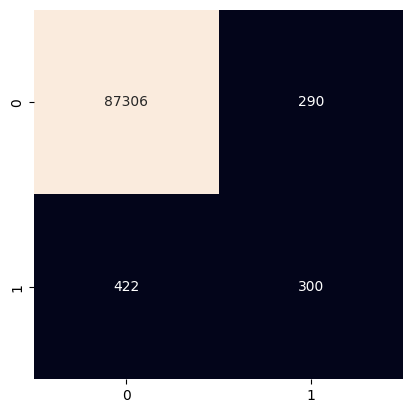

In [27]:
heatmap_predicted_results(X_test, y_test, model_1)

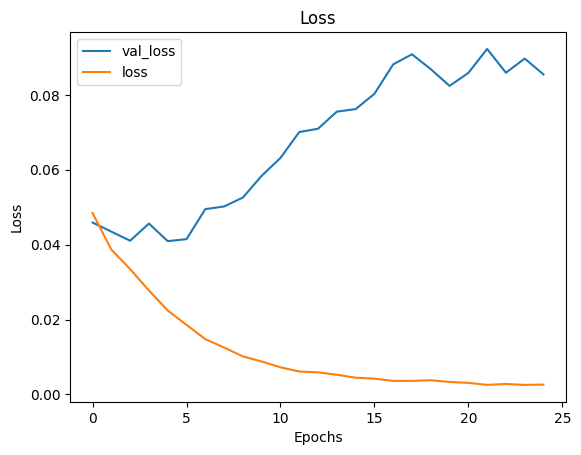

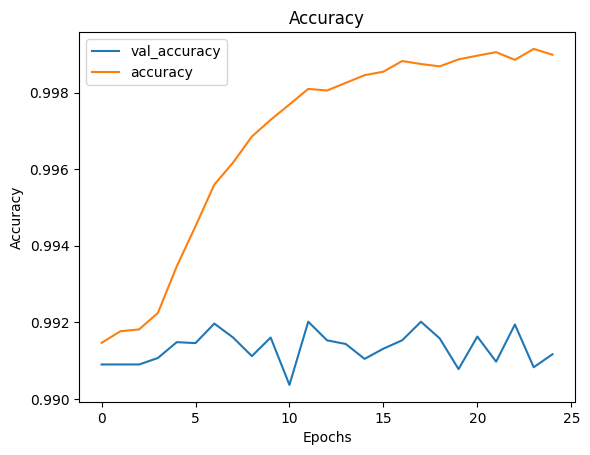

In [28]:
visualize_training_results(results_1)

### some tuning, 300k

In [14]:
model_2 = Sequential()
model_2.add(Dense(512, activation='relu', input_shape=(2555,)))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))


from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
results_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2)

c:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py:1402: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
644/644 [==============================] - 7s 11ms/step - loss: 0.0477 - accuracy: 0.9914 - val_loss: 0.0450 - val_accuracy: 0.9909
Epoch 2/50
644/644 [==============================] - 6s 10ms/step - loss: 0.0349 - accuracy: 0.9920 - val_loss: 0.0396 - val_accuracy: 0.9915
Epoch 3/50
644/644 [==============================] - 9s 13ms/step - loss: 0.0208 - accuracy: 0.9943 - val_loss: 0.0362 - val_accuracy: 0.9930
Epoch 4/50
644/644 [==============================] - 9s 14ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0400 - val_accuracy: 0.9933
Epoch 5/50
644/644 [==============================] - 8s 13ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0451 - val_accuracy: 0.9929
Epoch 6/50
644/644 [==============================] - 8s 13ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.0595 - val_accuracy: 0.9934
Epoch 7/50
644/644 [==============================] - 8s 13ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 0.0614 - val_accuracy: 0.9932

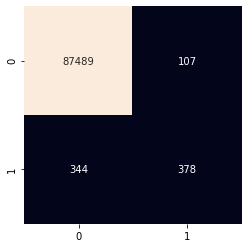

In [25]:
heatmap_predicted_results(X_test, y_test, model_2)

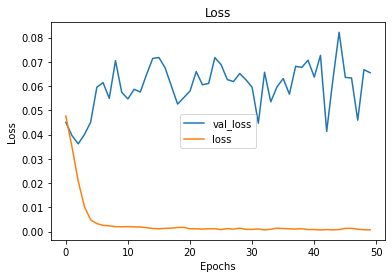

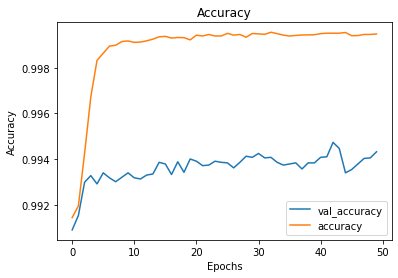

In [17]:
visualize_training_results(results_2)

### some tunings, 300k, reg

In [39]:
model_3 = Sequential()
model_3.add(Dense(512, activation='relu', input_shape=(2555,)))
model_3.add(Dense(128, activation='relu', kernel_regularizer = reg))
model.add(Dropout(0.2))
model_3.add(Dense(32, activation='relu', kernel_regularizer = reg))
model_3.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model_3.compile(loss='binary_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.Recall()])

In [40]:
results_3 = model_3.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=0.2)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
heatmap_predicted_results(X_test, y_test, model_3)